In [4]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from ast import literal_eval
from scipy.stats import pearsonr
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")
import geopandas as gpd

## Soutien au retours

In [182]:
columns_SaR = [
    'Total des cas SaR',
    'Identification',
    'Obtention documents de voyage',
    'Organisation du départ',
    'Retour bloqué ou suspendu',
    'Cas spéciaux',
    'Total SaR Asile',
    'Identification',
    'Obtention documents de voyage',
    'Organisation du départ',
    'Retour bloqué ou suspendu',
    'Cas spéciaux',
    'Total SaR LEI',
    'Identification',
    'Obtention documents de voyage',
    'Organisation du départ',
    'Retour bloqué ou suspendu',
    'Cas spéciaux'
]

pd.read_excel('Sar/SaR.xlsx', names = columns_SaR, skiprows=4)

,Total des cas SaR,Identification,Obtention documents de voyage,Organisation du départ,Retour bloqué ou suspendu,Cas spéciaux,Total SaR Asile,Identification.1,Obtention documents de voyage.1,Organisation du départ.1,Retour bloqué ou suspendu.1,Cas spéciaux.1,Total SaR LEI,Identification.2,Obtention documents de voyage.2,Organisation du départ.2,Retour bloqué ou suspendu.2,Cas spéciaux.2
Total,4834,2220,426,638,437,1113,4073,1951,367,537,225,993,761,269,59,101,212,120
Appenzell Rh.-ext.,16,5,3,0,0,8,16,5,3,0,0,8,0,0,0,0,0,0
Appenzell Rh.-int.,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Argovie,233,140,17,11,28,37,219,138,15,10,19,37,14,2,2,1,9,0
Bâle-Campagne,139,69,14,22,5,29,128,66,12,19,4,27,11,3,2,3,1,2
Bâle-Ville,118,51,7,12,17,31,89,42,6,0,13,28,29,9,1,12,4,3
Berne,486,208,48,65,37,128,402,182,38,49,22,111,84,26,10,16,15,17
Fribourg,218,78,15,71,6,48,201,72,11,66,4,48,17,6,4,5,2,0
Genève,406,222,43,18,72,51,228,144,28,5,16,35,178,78,15,13,56,16
Glaris,9,6,1,0,1,1,8,6,1,0,0,1,1,0,0,0,1,0


## Effective personnes in the asylum process in Switzerland

In [183]:
folderpath = 'processus_asile'

file_list = os.listdir(folderpath)

merged_df = pd.DataFrame()

# List of column names/labels to be used while reading the files into the dataframes in order to have a clean way to read the column titles. 
column_names = ['Canton',
'Total_pers_dans_processus',
'Pers_dans_procedure-total',
'Pers_dans_procedure-decision_asile',
'Pers_dans_procedure-entree_en_force',
'Protection_provisoire',
'Pers_admis_provis-total',
'Pers_admis_provis-se_7',
'Pers_admis_provis-b_7',
'Pers_admis_provis-pr_se_7',
'Pers_admis_provis-pr_b_7',
'Pers_en_suspens_renvoi-total',
'Pers_en_suspens_renvoi-groupes',
'Pers_en_suspens_renvoi-individu',
'Cas_speciaux']

column_names2 = ['Canton',
'Total_pers_dans_processus',
'Pers_dans_procedure-total',
'Pers_dans_procedure-decision_asile',
'Pers_dans_procedure-entree_en_force',
'Pers_admis_provis-total',
'Pers_admis_provis-se_7',
'Pers_admis_provis-b_7',
'Pers_admis_provis-pr_se_7',
'Pers_admis_provis-pr_b_7',
'Pers_en_suspens_renvoi-total',
'Pers_en_suspens_renvoi-groupes',
'Pers_en_suspens_renvoi-individu',
'Cas_speciaux']


# As we have for each month a different excel sheet, we need to merge them first to one dataset. This is done in the following lines. It must be noted that the excels have a slight different
# structure after the year 2021 => therefore we needed to make a little adaptation in the code. 
for file_name in file_list:
    if file_name.endswith('.xlsx'):
        # Read each Excel file into a dataframe and append to the list
        if int(file_name[32:36]) < 2022:
            df = pd.read_excel(os.path.join(folderpath, file_name), names = column_names2,  sheet_name=0, skiprows=4)
            df['Protection_provisoire'] = 'Not available'
        else:
            df = pd.read_excel(os.path.join(folderpath, file_name), names = column_names,  sheet_name=0, skiprows=4)
        df['Date'] = file_name[32:39]
        merged_df = pd.concat([merged_df, df], ignore_index=True, axis=0)

display(merged_df)

,Canton,Total_pers_dans_processus,Pers_dans_procedure-total,Pers_dans_procedure-decision_asile,Pers_dans_procedure-entree_en_force,Pers_admis_provis-total,Pers_admis_provis-se_7,Pers_admis_provis-b_7,Pers_admis_provis-pr_se_7,Pers_admis_provis-pr_b_7,Pers_en_suspens_renvoi-total,Pers_en_suspens_renvoi-groupes,Pers_en_suspens_renvoi-individu,Cas_speciaux,Protection_provisoire,Date
0,Total,65578,23116,19825,3291,41990,22640,9465,7686,2199,397,0,397,75,Not available,2018-01
1,Appenzell Rh.-ext.,486,196,155,41,289,149,22,92,26,1,0,1,0,Not available,2018-01
2,Appenzell Rh.-int.,134,67,60,7,66,33,3,30,0,1,0,1,0,Not available,2018-01
3,Argovie,4470,1987,1801,186,2451,1424,315,570,142,32,0,32,0,Not available,2018-01
4,Bâle-Campagne,1896,449,361,88,1429,631,430,243,125,14,0,14,4,Not available,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2011,Valais,5815,744,599,145,2520,921,1230,103,266,12,0,12,154,2385,2023-12
2012,Vaud,12663,1456,1140,316,4780,1782,2278,199,521,22,0,22,237,6168,2023-12
2013,Zoug,1713,295,249,46,483,242,133,46,62,0,0,0,52,883,2023-12
2014,Zurich,23407,2758,2130,628,7762,3160,3181,397,1024,88,0,88,682,12117,2023-12


### Explore dataset

**Thought process**: In order to get a better feeling of the dataset, we explore it a bit further. 

In [184]:
# Have a look at the datatypes in the dataset
merged_df.dtypes

Canton                                 object
Total_pers_dans_processus               int64
Pers_dans_procedure-total               int64
Pers_dans_procedure-decision_asile      int64
Pers_dans_procedure-entree_en_force     int64
Pers_admis_provis-total                 int64
Pers_admis_provis-se_7                  int64
Pers_admis_provis-b_7                   int64
Pers_admis_provis-pr_se_7               int64
Pers_admis_provis-pr_b_7                int64
Pers_en_suspens_renvoi-total            int64
Pers_en_suspens_renvoi-groupes          int64
Pers_en_suspens_renvoi-individu         int64
Cas_speciaux                            int64
Protection_provisoire                  object
Date                                   object
dtype: object

In [185]:
# Transform the column Date to type datetime
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

In [186]:
# Check for missing values, displayed in percentages
(merged_df.isna().sum()/len(merged_df))*100

Canton                                 0.0
Total_pers_dans_processus              0.0
Pers_dans_procedure-total              0.0
Pers_dans_procedure-decision_asile     0.0
Pers_dans_procedure-entree_en_force    0.0
Pers_admis_provis-total                0.0
Pers_admis_provis-se_7                 0.0
Pers_admis_provis-b_7                  0.0
Pers_admis_provis-pr_se_7              0.0
Pers_admis_provis-pr_b_7               0.0
Pers_en_suspens_renvoi-total           0.0
Pers_en_suspens_renvoi-groupes         0.0
Pers_en_suspens_renvoi-individu        0.0
Cas_speciaux                           0.0
Protection_provisoire                  0.0
Date                                   0.0
dtype: float64

In [187]:
#To get the first descriptive statistic of the data
merged_df.describe()

,Total_pers_dans_processus,Pers_dans_procedure-total,Pers_dans_procedure-decision_asile,Pers_dans_procedure-entree_en_force,Pers_admis_provis-total,Pers_admis_provis-se_7,Pers_admis_provis-b_7,Pers_admis_provis-pr_se_7,Pers_admis_provis-pr_b_7,Pers_en_suspens_renvoi-total,Pers_en_suspens_renvoi-groupes,Pers_en_suspens_renvoi-individu,Cas_speciaux,Date
count,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.0,2016.000000,2016.000000,2016
mean,5550.870040,860.229167,654.585317,205.643849,3315.742063,1730.676587,899.569444,379.219246,306.276786,32.384921,0.0,32.384921,45.402778,2020-12-15 15:20:00
min,67.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,2018-01-01 00:00:00
25%,607.750000,91.000000,59.000000,24.000000,361.500000,189.000000,67.000000,48.000000,33.000000,2.000000,0.0,2.000000,0.000000,2019-06-23 12:00:00
50%,1805.500000,245.500000,152.000000,76.000000,986.500000,542.000000,263.000000,129.000000,98.000000,9.000000,0.0,9.000000,2.000000,2020-12-16 12:00:00
75%,3923.500000,611.250000,420.250000,166.000000,2502.500000,1383.500000,602.250000,274.000000,225.000000,29.000000,0.0,29.000000,17.000000,2022-06-08 12:00:00
max,134387.000000,23116.000000,19825.000000,3472.000000,48959.000000,28450.000000,18916.000000,7708.000000,6094.000000,552.000000,0.0,552.000000,7323.000000,2023-12-01 00:00:00
std,15355.439356,2417.589856,1938.964703,528.482484,8529.689864,4502.082115,2410.764929,1033.819691,827.893958,84.350201,0.0,84.350201,278.529094,NaN


### Some graphic attempts

**Thought process**: In order to get a bit a better feeling of our data and to have some first visual possibilites, we make some easy plots with the data. 

The first plot is a comparison between the total persons in the process of the canton Lucerne and the canton Vaud. Its interessting how we can already see the important shift of persons in the process with the start of the Ukranian war. 

In [188]:
to_plot = merged_df[(merged_df['Canton'] != 'Total') & (merged_df['Canton'] != 'Pas d\'indication')]
to_plot.head()

,Canton,Total_pers_dans_processus,Pers_dans_procedure-total,Pers_dans_procedure-decision_asile,Pers_dans_procedure-entree_en_force,Pers_admis_provis-total,Pers_admis_provis-se_7,Pers_admis_provis-b_7,Pers_admis_provis-pr_se_7,Pers_admis_provis-pr_b_7,Pers_en_suspens_renvoi-total,Pers_en_suspens_renvoi-groupes,Pers_en_suspens_renvoi-individu,Cas_speciaux,Protection_provisoire,Date
1,Appenzell Rh.-ext.,486,196,155,41,289,149,22,92,26,1,0,1,0,Not available,2018-01-01
2,Appenzell Rh.-int.,134,67,60,7,66,33,3,30,0,1,0,1,0,Not available,2018-01-01
3,Argovie,4470,1987,1801,186,2451,1424,315,570,142,32,0,32,0,Not available,2018-01-01
4,Bâle-Campagne,1896,449,361,88,1429,631,430,243,125,14,0,14,4,Not available,2018-01-01
5,Bâle-Ville,1184,326,246,80,837,474,163,148,52,21,0,21,0,Not available,2018-01-01


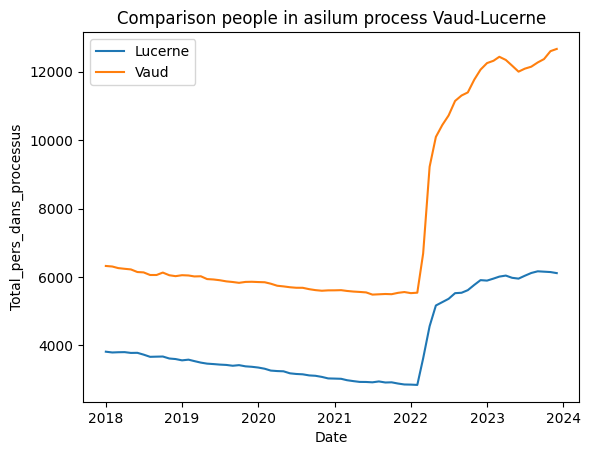

In [189]:
# Comparison canton Vaud and Canton Luzern
Vaud = to_plot[to_plot['Canton']=='Vaud']
Lucerne = to_plot[to_plot['Canton']=='Lucerne']
sns.lineplot(data=Lucerne, x="Date", y="Total_pers_dans_processus", label = 'Lucerne')
sns.lineplot(data=Vaud, x="Date", y="Total_pers_dans_processus", label = 'Vaud')
plt.title('Comparison people in asilum process Vaud-Lucerne')
plt.show()


We make the same comparison plot with the people awaiting expulsion. Its interessting to see how canton Luzerne has an upwards tendency while the canton of Vaud has a downwards tendency. What might be the reason behind?

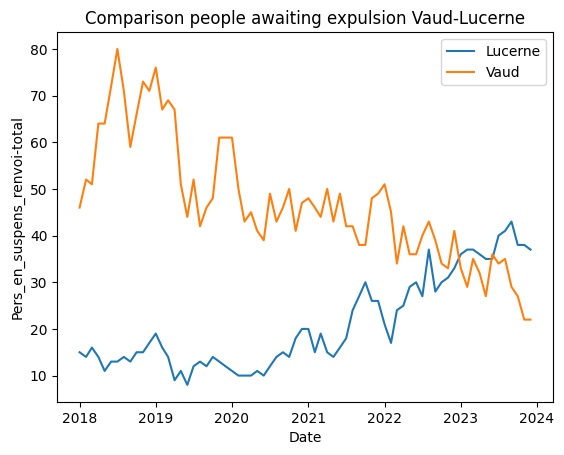

In [190]:
# Comparison canton Lucerne and Vaud for people awaiting expulsion. 
sns.lineplot(data=Lucerne, x="Date", y="Pers_en_suspens_renvoi-total", label = 'Lucerne')
sns.lineplot(data=Vaud, x="Date", y="Pers_en_suspens_renvoi-total", label = 'Vaud')
plt.title('Comparison people awaiting expulsion Vaud-Lucerne')
plt.show()

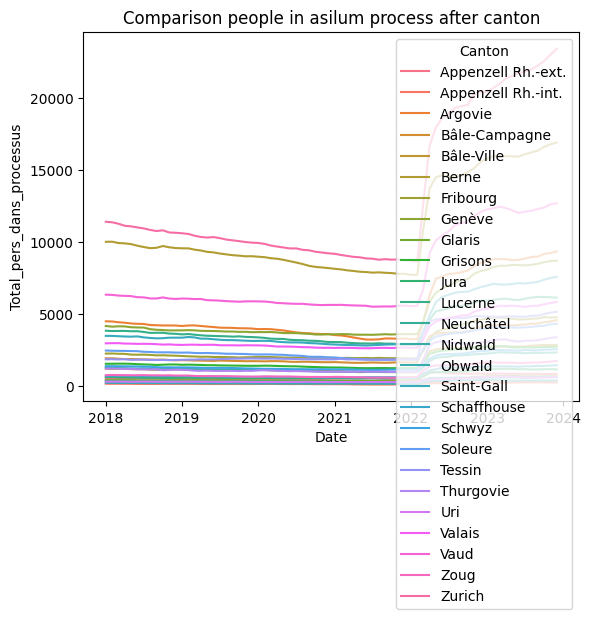

In [191]:
sns.lineplot(data=to_plot, x="Date", y="Total_pers_dans_processus", hue="Canton")
plt.title('Comparison people in asilum process after canton')
plt.show()

As the numers are sorted after canton, we were interested to have this visually adapted on the swiss map. Therefore we imported a shapefile with the Swiss cantons in them, and merged it with our dataset to have a geometrical structure for the numbers of each canton. 

In [192]:
gdf = gpd.read_file('boundaries/Kantone.shp')

In [193]:
gdf.head()

,EINWOHNERZ,KANTONSFLA,NAME,geometry
0,200096.0,710530.0,Graubünden,"POLYGON Z ((2735215.665 1194955.161 2870.714, ..."
1,1043081.0,595850.0,Bern,MULTIPOLYGON Z (((2595241.510 1169313.282 2090...
2,348503.0,522463.0,Valais,"POLYGON Z ((2601807.628 1136116.777 2948.413, ..."
3,814762.0,321202.0,Vaud,MULTIPOLYGON Z (((2555092.813 1138713.419 372....
4,350986.0,281215.0,Ticino,MULTIPOLYGON Z (((2727358.511 1119219.094 1351...


In [194]:
gdf = gdf.rename(columns={'NAME': 'Canton'})
gdf.head()

,EINWOHNERZ,KANTONSFLA,Canton,geometry
0,200096.0,710530.0,Graubünden,"POLYGON Z ((2735215.665 1194955.161 2870.714, ..."
1,1043081.0,595850.0,Bern,MULTIPOLYGON Z (((2595241.510 1169313.282 2090...
2,348503.0,522463.0,Valais,"POLYGON Z ((2601807.628 1136116.777 2948.413, ..."
3,814762.0,321202.0,Vaud,MULTIPOLYGON Z (((2555092.813 1138713.419 372....
4,350986.0,281215.0,Ticino,MULTIPOLYGON Z (((2727358.511 1119219.094 1351...


In order to merge the two datasets, we needed to adapt a the Canton names, as one of the datasets was in German and the other was in French. This is changed here

In [195]:
list_franz = ['Appenzell Rh.-ext.',
 'Appenzell Rh.-int.',
 'Argovie',
 'Berne',
 'Bâle-Campagne',
 'Bâle-Ville',
 'Fribourg',
 'Genève',
 'Glaris',
 'Grisons',
 'Jura',
 'Lucerne',
 'Neuchâtel',
 'Nidwald',
 'Obwald',
 'Saint-Gall',
 'Schaffhouse',
 'Schwyz',
 'Soleure',
 'Tessin',
 'Thurgovie',
 'Uri',
 'Valais',
 'Vaud',
 'Zoug',
 'Zurich']

list_deutsch = ['Appenzell Ausserrhoden',
 'Appenzell Innerrhoden', 'Aargau', 'Bern',
 'Basel-Landschaft',
 'Basel-Stadt',
 'Fribourg',
 'Genève',
 'Glarus',
 'Graubünden',
 'Jura',
 'Luzern',
 'Neuchâtel',
 'Nidwalden',
 'Obwalden',
 'St. Gallen',
 'Schaffhausen',
 'Schwyz',
 'Solothurn',
 'Ticino',
 'Thurgau',
 'Uri',
 'Valais',
 'Vaud',
 'Zug',
 'Zürich']

In [196]:
cantons = merged_df[(merged_df['Canton'] != 'Total') & (merged_df['Canton'] != 'Pas d\'indication')]

In [197]:
gdf['Canton'] = gdf['Canton'].replace(list_deutsch, 
                                      list_franz)

In [198]:
gdf.head()

,EINWOHNERZ,KANTONSFLA,Canton,geometry
0,200096.0,710530.0,Grisons,"POLYGON Z ((2735215.665 1194955.161 2870.714, ..."
1,1043081.0,595850.0,Berne,MULTIPOLYGON Z (((2595241.510 1169313.282 2090...
2,348503.0,522463.0,Valais,"POLYGON Z ((2601807.628 1136116.777 2948.413, ..."
3,814762.0,321202.0,Vaud,MULTIPOLYGON Z (((2555092.813 1138713.419 372....
4,350986.0,281215.0,Tessin,MULTIPOLYGON Z (((2727358.511 1119219.094 1351...


The following is a plot of the geodataframe without the merge yet.

<Axes: >

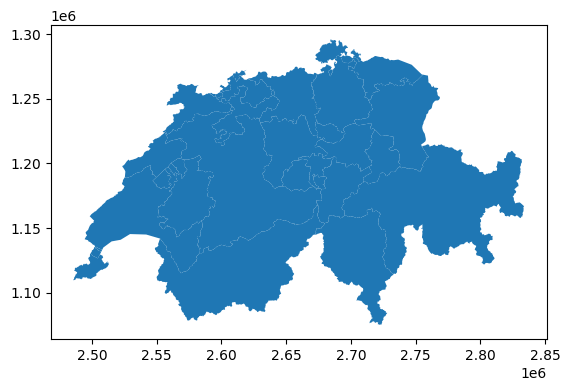

In [199]:
gdf.plot()

We finally merge the two datasets and plot them afterwards. 

In [200]:
#Doesnt work yet, as canton names arnet the same

joined_df = pd.merge(merged_df, gdf, on='Canton', how='left')
joined_df = joined_df[(joined_df['Canton'] != 'Total') & (joined_df['Canton'] != 'Pas d\'indication')]
joined_df.head()

,Canton,Total_pers_dans_processus,Pers_dans_procedure-total,Pers_dans_procedure-decision_asile,Pers_dans_procedure-entree_en_force,Pers_admis_provis-total,Pers_admis_provis-se_7,Pers_admis_provis-b_7,Pers_admis_provis-pr_se_7,Pers_admis_provis-pr_b_7,Pers_en_suspens_renvoi-total,Pers_en_suspens_renvoi-groupes,Pers_en_suspens_renvoi-individu,Cas_speciaux,Protection_provisoire,Date,EINWOHNERZ,KANTONSFLA,geometry
1,Appenzell Rh.-ext.,486,196,155,41,289,149,22,92,26,1,0,1,0,Not available,2018-01-01,55309.0,24284.0,MULTIPOLYGON Z (((2755968.016 1246115.811 875....
2,Appenzell Rh.-int.,134,67,60,7,66,33,3,30,0,1,0,1,0,Not available,2018-01-01,16293.0,17248.0,MULTIPOLYGON Z (((2744480.834 1246625.895 801....
3,Argovie,4470,1987,1801,186,2451,1424,315,570,142,32,0,32,0,Not available,2018-01-01,694072.0,140380.0,MULTIPOLYGON Z (((2655848.686 1230370.051 657....
4,Bâle-Campagne,1896,449,361,88,1429,631,430,243,125,14,0,14,4,Not available,2018-01-01,290969.0,51767.0,MULTIPOLYGON Z (((2601796.424 1255629.240 769....
5,Bâle-Ville,1184,326,246,80,837,474,163,148,52,21,0,21,0,Not available,2018-01-01,196735.0,3695.0,"POLYGON Z ((2608828.375 1265964.023 289.266, 2..."


In [201]:
gdf2 = gpd.GeoDataFrame(joined_df, geometry='geometry')

<Axes: >

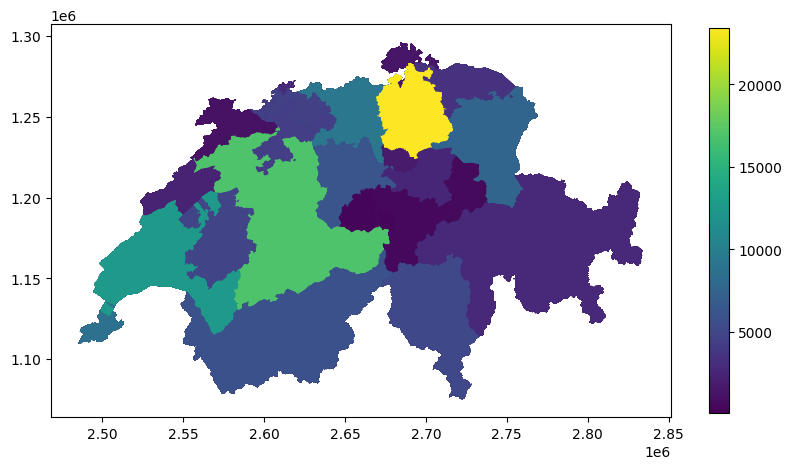

In [202]:
gdf2.plot(column='Total_pers_dans_processus', cmap='viridis', legend=True, markersize=50, figsize=(10, 10), legend_kwds={'shrink': 0.5})


**Thought process**: Looking up the numbers of residents of each cantons, we saw that cantons with more residents have as well more people in the asylum system. In order to see, if there really is a difference among the cantons, we would therefore need to take that into account. This can be done in a further step. 

**Thought process**: Other interessting factors to look at are the nationality of the people in process. For a try, we once the last month of 2023 and look there at the canton Luzerne. For that the plots are more readable, we took only the top 10 nationalities present this month. 

In [203]:
luzerne = pd.read_excel('processus_asile/6-10-Effectif-processus-asile-f-2023-12.xlsx',   sheet_name= 'LU', skiprows=15)
luzerne.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,Algérie,14.0,10.0,5.0,5.0,0.0,3.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Angola,33.0,0.0,0.0,0.0,0.0,33.0,7.0,22.0,0.0,4.0,0.0,0.0,0.0,0.0
2,Burundi,13.0,10.0,10.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0
3,Cameroun,4.0,3.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Congo RDC,24.0,9.0,4.0,5.0,0.0,14.0,2.0,12.0,0.0,0.0,1.0,0.0,1.0,0.0


In [204]:


# Filter out unwanted rows
unwanted_rows = ['Total', 'Pas d\'indication', 'Europe', 'Afrique', 'Asie']
luzerne = luzerne[~luzerne['Unnamed: 0'].isin(unwanted_rows)]
luzerne['Unnamed: 0'] = luzerne['Unnamed: 0'].astype(str)
luzerne = luzerne[~luzerne['Unnamed: 0'].str.startswith('Total')]

# Sort the DataFrame based on the second column in descending order
luzerne = luzerne.sort_values(by='Unnamed: 1', ascending=False)

# Select the top 10 rows
top10 = luzerne.head(10)

In [205]:
display(top10)

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
67,Ukraine,3308.0,6.0,0.0,6.0,3126.0,23.0,22.0,1.0,0.0,0.0,0.0,0.0,0.0,153.0
37,Afghanistan,811.0,109.0,88.0,21.0,1.0,693.0,535.0,157.0,0.0,1.0,7.0,0.0,7.0,1.0
7,Érythrée,449.0,15.0,11.0,4.0,0.0,428.0,31.0,129.0,80.0,188.0,5.0,0.0,5.0,1.0
53,Syrie,383.0,16.0,12.0,4.0,0.0,367.0,130.0,213.0,14.0,10.0,0.0,0.0,0.0,0.0
66,Turquie,271.0,207.0,133.0,74.0,13.0,47.0,10.0,4.0,27.0,6.0,4.0,0.0,4.0,0.0
23,Somalie,121.0,13.0,9.0,4.0,0.0,107.0,45.0,62.0,0.0,0.0,1.0,0.0,1.0,0.0
43,Irak,96.0,16.0,15.0,1.0,4.0,76.0,41.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0
52,Sri Lanka,85.0,21.0,7.0,14.0,1.0,51.0,10.0,37.0,2.0,2.0,12.0,0.0,12.0,0.0
44,Iran,71.0,37.0,22.0,15.0,3.0,31.0,7.0,1.0,9.0,14.0,0.0,0.0,0.0,0.0
40,Chine (rép. pop.),67.0,3.0,1.0,2.0,0.0,64.0,0.0,1.0,19.0,44.0,0.0,0.0,0.0,0.0


([<matplotlib.patches.Wedge at 0x12c8bf11b50>,
 [Text(-0.28774579150044455, 1.061697866379029, 'Ukraine'),
  Text(-0.6133456068400271, -0.9131304214459395, 'Afghanistan'),
  Text(0.11817775523633617, -1.0936334020901615, 'Érythrée'),
  Text(0.5929301249644567, -0.9265170623953095, 'Syrie'),
  Text(0.8831987195331807, -0.6557133686413218, 'Turquie'),
  Text(1.0038879343391476, -0.4496765674218301, 'Somalie'),
  Text(1.0506320049209765, -0.3258410505687231, 'Irak'),
  Text(1.0780070091580334, -0.2188627154317338, 'Sri Lanka'),
  Text(1.0928917676412633, -0.12485024718419828, 'Iran'),
  Text(1.099239987608938, -0.04088336631812475, 'Chine (rép. pop.)')])

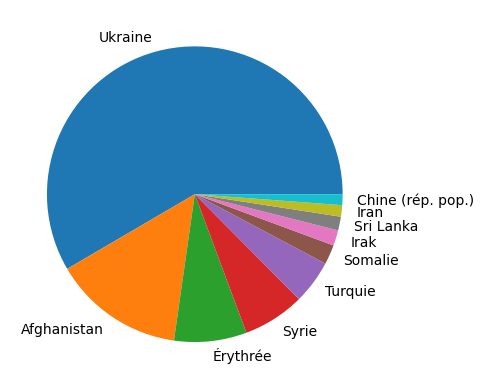

In [206]:
#Plot the pie chart
plt.pie(top10['Unnamed: 1'], labels = top10['Unnamed: 0'])

In [207]:
merged_df2 = pd.DataFrame()
for file_name in file_list:
    if file_name.endswith('.xlsx'):
        # Read each Excel file into a dataframe and append to the list
        if int(file_name[32:36]) < 2022:
            df = pd.read_excel(os.path.join(folderpath, file_name), names = column_names2,  sheet_name='LU', skiprows=15)
            df['Protection_provisoire'] = 'Not available'
        else:
            df = pd.read_excel(os.path.join(folderpath, file_name), names = column_names,  sheet_name='LU', skiprows=15)
        df['Date'] = file_name[32:39]
        merged_df2 = pd.concat([merged_df2, df], ignore_index=True, axis=0)

display(merged_df2)


,Canton,Total_pers_dans_processus,Pers_dans_procedure-total,Pers_dans_procedure-decision_asile,Pers_dans_procedure-entree_en_force,Pers_admis_provis-total,Pers_admis_provis-se_7,Pers_admis_provis-b_7,Pers_admis_provis-pr_se_7,Pers_admis_provis-pr_b_7,Pers_en_suspens_renvoi-total,Pers_en_suspens_renvoi-groupes,Pers_en_suspens_renvoi-individu,Cas_speciaux,Protection_provisoire,Date
0,Algérie,6.0,3.0,1.0,2.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Not available,2018-01
1,Angola,58.0,1.0,1.0,0.0,57.0,12.0,35.0,2.0,8.0,0.0,0.0,0.0,0.0,Not available,2018-01
2,Burundi,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not available,2018-01
3,Cameroun,4.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,Not available,2018-01
4,Congo,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not available,2018-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4959,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023-12
4960,Apatride,2.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2023-12
4961,Sans nationalité,11.0,2.0,1.0,1.0,8.0,7.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2023-12
4962,État inconnu,17.0,0.0,0.0,0.0,17.0,4.0,10.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,2023-12


In [208]:
merged_df2['Canton'] = merged_df2['Canton'].dropna()

In [209]:
merged_df2['Date'] = pd.to_datetime(merged_df2['Date'])

In [210]:
merged_df2.columns

Index(['Canton', 'Total_pers_dans_processus', 'Pers_dans_procedure-total',
       'Pers_dans_procedure-decision_asile',
       'Pers_dans_procedure-entree_en_force', 'Pers_admis_provis-total',
       'Pers_admis_provis-se_7', 'Pers_admis_provis-b_7',
       'Pers_admis_provis-pr_se_7', 'Pers_admis_provis-pr_b_7',
       'Pers_en_suspens_renvoi-total', 'Pers_en_suspens_renvoi-groupes',
       'Pers_en_suspens_renvoi-individu', 'Cas_speciaux',
       'Protection_provisoire', 'Date'],
      dtype='object')

In [211]:
merged_df2 = merged_df2.dropna(subset=['Canton'])

# Filter out unwanted rows
unwanted_rows = ['Total', 'Europe', 'Afrique', 'Asie']
Countr = merged_df2[
    (~merged_df2['Canton'].str.startswith('Total')) &
    (~merged_df2['Canton'].isin(unwanted_rows))
]
Countr.head()

,Canton,Total_pers_dans_processus,Pers_dans_procedure-total,Pers_dans_procedure-decision_asile,Pers_dans_procedure-entree_en_force,Pers_admis_provis-total,Pers_admis_provis-se_7,Pers_admis_provis-b_7,Pers_admis_provis-pr_se_7,Pers_admis_provis-pr_b_7,Pers_en_suspens_renvoi-total,Pers_en_suspens_renvoi-groupes,Pers_en_suspens_renvoi-individu,Cas_speciaux,Protection_provisoire,Date
0,Algérie,6.0,3.0,1.0,2.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Not available,2018-01-01
1,Angola,58.0,1.0,1.0,0.0,57.0,12.0,35.0,2.0,8.0,0.0,0.0,0.0,0.0,Not available,2018-01-01
2,Burundi,2.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not available,2018-01-01
3,Cameroun,4.0,1.0,1.0,0.0,2.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,Not available,2018-01-01
4,Congo,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not available,2018-01-01


**Thought process**: in order to not look at all the nationalities over all the years, we take the dominating nationalities in the canton luzerne (can be changed by the dominating nationalities in CH) and only plot them across time. 

In [212]:
Countr = merged_df2[merged_df2['Canton'].isin(top10['Unnamed: 0'])]
display(Countr)

,Canton,Total_pers_dans_processus,Pers_dans_procedure-total,Pers_dans_procedure-decision_asile,Pers_dans_procedure-entree_en_force,Pers_admis_provis-total,Pers_admis_provis-se_7,Pers_admis_provis-b_7,Pers_admis_provis-pr_se_7,Pers_admis_provis-pr_b_7,Pers_en_suspens_renvoi-total,Pers_en_suspens_renvoi-groupes,Pers_en_suspens_renvoi-individu,Cas_speciaux,Protection_provisoire,Date
21,Somalie,231.0,48.0,47.0,1.0,183.0,102.0,81.0,0.0,0.0,0.0,0.0,0.0,0.0,Not available,2018-01-01
32,Afghanistan,757.0,361.0,343.0,18.0,395.0,340.0,55.0,0.0,0.0,1.0,0.0,1.0,0.0,Not available,2018-01-01
37,Chine (rép. pop.),160.0,22.0,21.0,1.0,137.0,2.0,1.0,100.0,34.0,1.0,0.0,1.0,0.0,Not available,2018-01-01
40,Irak,211.0,104.0,98.0,6.0,107.0,45.0,57.0,1.0,4.0,0.0,0.0,0.0,0.0,Not available,2018-01-01
41,Iran,73.0,50.0,41.0,9.0,21.0,1.0,0.0,5.0,15.0,2.0,0.0,2.0,0.0,Not available,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4934,Iran,71.0,37.0,22.0,15.0,31.0,7.0,1.0,9.0,14.0,0.0,0.0,0.0,0.0,3.0,2023-12-01
4942,Sri Lanka,85.0,21.0,7.0,14.0,51.0,10.0,37.0,2.0,2.0,12.0,0.0,12.0,0.0,1.0,2023-12-01
4943,Syrie,383.0,16.0,12.0,4.0,367.0,130.0,213.0,14.0,10.0,0.0,0.0,0.0,0.0,0.0,2023-12-01
4956,Turquie,271.0,207.0,133.0,74.0,47.0,10.0,4.0,27.0,6.0,4.0,0.0,4.0,0.0,13.0,2023-12-01


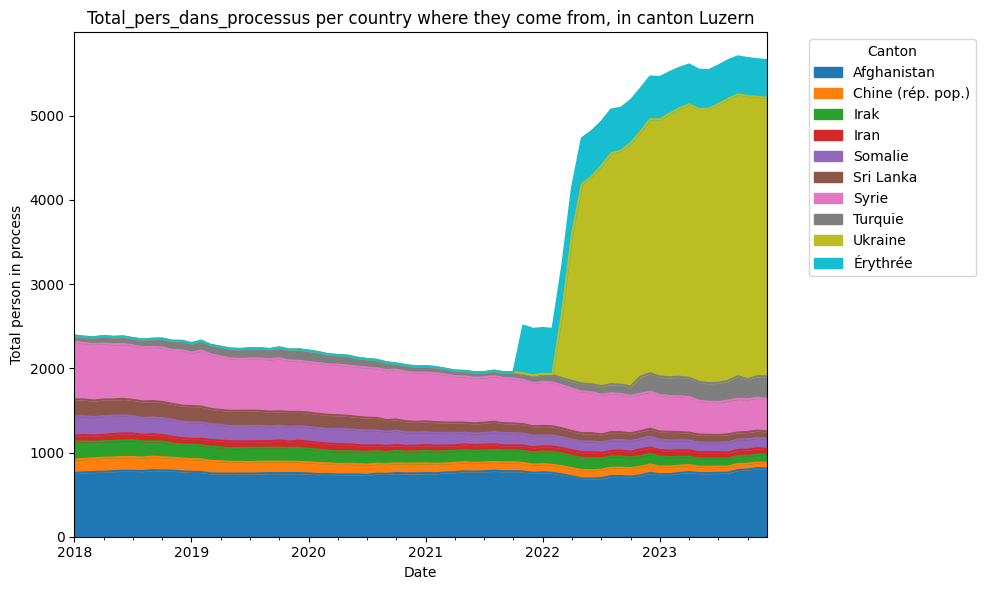

In [213]:

pivot_df = Countr.pivot(index='Date', columns='Canton', values='Total_pers_dans_processus')

# Plot the stacked area plot
pivot_df.plot.area(figsize=(10, 6))
plt.title('Total_pers_dans_processus per country where they come from, in canton Luzern')
plt.xlabel('Date')
plt.ylabel('Total person in process')
plt.legend(title='Canton', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [214]:
Total_dfs = merged_df2[merged_df2['Canton'].str.startswith('Total')]
display(Total_dfs)

,Canton,Total_pers_dans_processus,Pers_dans_procedure-total,Pers_dans_procedure-decision_asile,Pers_dans_procedure-entree_en_force,Pers_admis_provis-total,Pers_admis_provis-se_7,Pers_admis_provis-b_7,Pers_admis_provis-pr_se_7,Pers_admis_provis-pr_b_7,Pers_en_suspens_renvoi-total,Pers_en_suspens_renvoi-groupes,Pers_en_suspens_renvoi-individu,Cas_speciaux,Protection_provisoire,Date
26,Total Afrique,1396.0,447.0,353.0,94.0,945.0,374.0,181.0,311.0,79.0,4.0,0.0,4.0,0.0,Not available,2018-01-01
30,Total Amérique,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Not available,2018-01-01
49,Total Asie,2159.0,864.0,793.0,71.0,1274.0,853.0,211.0,129.0,81.0,9.0,0.0,9.0,12.0,Not available,2018-01-01
60,Total Europe,199.0,68.0,47.0,21.0,131.0,40.0,82.0,6.0,3.0,0.0,0.0,0.0,0.0,Not available,2018-01-01
65,Total proven. inconnu,60.0,19.0,17.0,2.0,39.0,23.0,7.0,3.0,6.0,2.0,0.0,2.0,0.0,Not available,2018-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4916,Total Afrique,805.0,123.0,77.0,46.0,662.0,119.0,266.0,83.0,194.0,13.0,0.0,13.0,4.0,3.0,2023-12-01
4925,Total Amérique,38.0,31.0,14.0,17.0,6.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2023-12-01
4946,Total Asie,1580.0,228.0,155.0,73.0,1307.0,734.0,453.0,45.0,75.0,19.0,0.0,19.0,2.0,24.0,2023-12-01
4958,Total Europe,3659.0,226.0,141.0,85.0,98.0,39.0,26.0,27.0,6.0,5.0,0.0,5.0,155.0,3175.0,2023-12-01


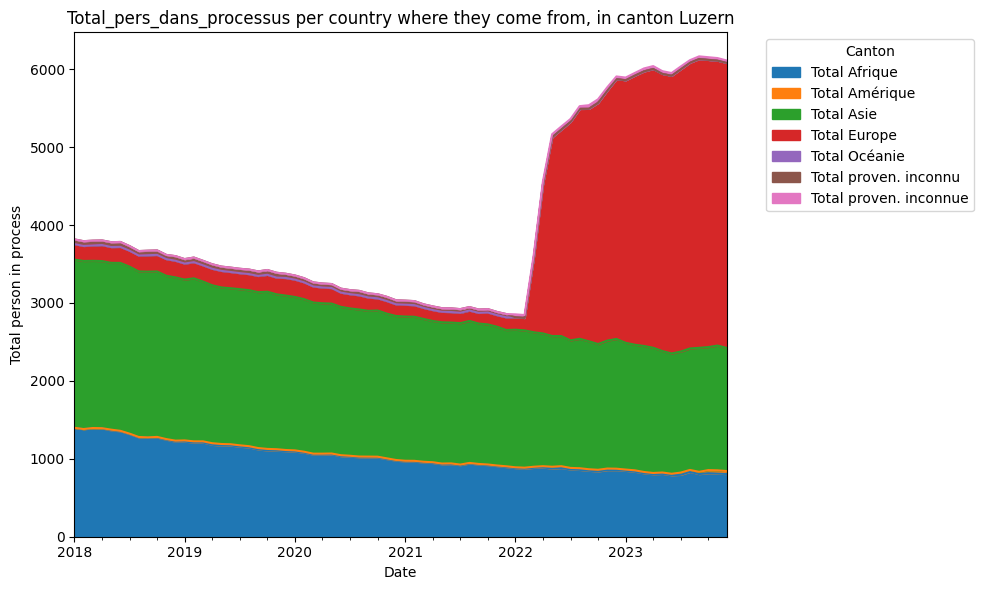

In [215]:
pivot_df = Total_dfs.pivot(index='Date', columns='Canton', values='Total_pers_dans_processus')

# Plot the stacked area plot
pivot_df.plot.area(figsize=(10, 6))
plt.title('Total_pers_dans_processus per country where they come from, in canton Luzern')
plt.xlabel('Date')
plt.ylabel('Total person in process')
plt.legend(title='Canton', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## export to json

In [7]:
# load CH_Ct.xlsx and export to json
df = pd.read_excel('../data_world/CH_Ct.xlsx')
df.to_json('CH_Ct.json', orient='records')
